# CryptAnalyse

## Mise en place

### Bibliothèques utilisées

Nous avons utilisé Pandas, Matplotlib et Os pour ce projet.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### Import des fichier CSV

In [11]:
extracted_folder = 'data_csv/'
dataframes = []
for filename in os.listdir(extracted_folder):
    if filename.endswith('.csv'):
        file_path = os.path.join(extracted_folder, filename)
        dataf = pd.read_csv(file_path)
        
        crypto_name = filename.replace('.csv', '')
        dataf['Crypto Name'] = crypto_name
        dataframes.append(dataf)

df = pd.concat(dataframes, ignore_index=True)
df
df[df["Crypto Name"]=="bitcoin" ]

,Date,Open,High,Low,Close,Volume,Currency,Crypto Name
14159,2010-07-18,0.0,0.1,0.1,0.1,75.0,USD,bitcoin
14160,2010-07-19,0.1,0.1,0.1,0.1,574.0,USD,bitcoin
14161,2010-07-20,0.1,0.1,0.1,0.1,262.0,USD,bitcoin
14162,2010-07-21,0.1,0.1,0.1,0.1,575.0,USD,bitcoin
14163,2010-07-22,0.1,0.1,0.1,0.1,2160.0,USD,bitcoin
...,...,...,...,...,...,...,...,...
18574,2022-08-19,23201.6,23202.3,20807.8,20831.3,339472.0,USD,bitcoin
18575,2022-08-20,20830.7,21357.4,20784.8,21138.9,206943.0,USD,bitcoin
18576,2022-08-21,21138.9,21692.4,21077.4,21517.2,177522.0,USD,bitcoin
18577,2022-08-22,21516.8,21517.4,20912.1,21416.3,251833.0,USD,bitcoin


## Un rapide tour des cryptomonnaies en général

Pour montrer l'exemple, nous allons nous concentrer sur quatre cryptomonnaies majeures en termes de capitalisation : le Bitcoin (1er), l'Ethereum (2ème), le Dogecoin (7ème) et le Tezos (88ème).

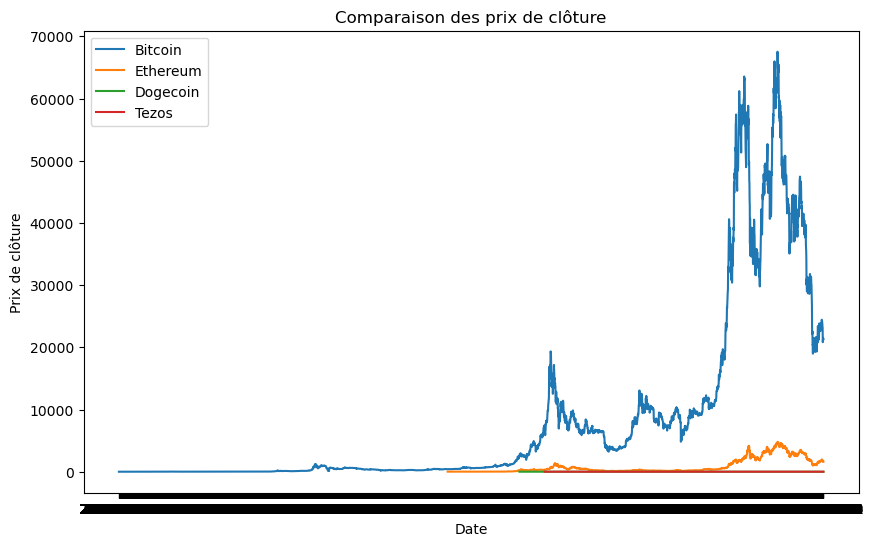

In [12]:
crypto_list = ["bitcoin", "ethereum", "dogecoin", "Tezos"] 
plt.figure(figsize=(10, 6))
for crypto in crypto_list:
    crypto_data = df[df["Crypto Name"] == crypto]
    plt.plot(crypto_data['Date'], crypto_data['Close'], label=crypto.capitalize())

plt.title('Comparaison des prix de clôture')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.show()


On remarque sur le schéma que les cryptomonnaies ont tendance à avoir des mouvements similaires, chacune à son échelle.

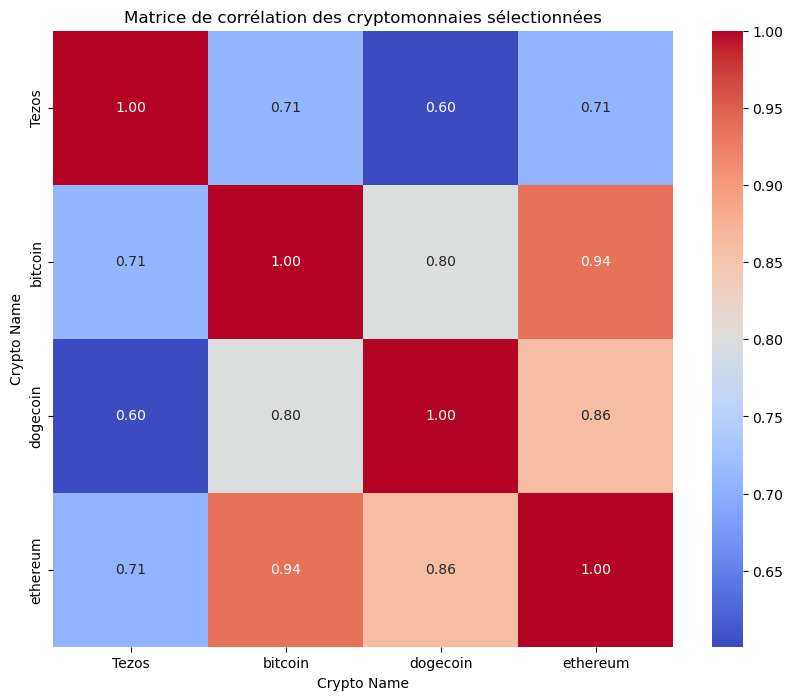

In [13]:
import seaborn as sns

crypto_subset = ["bitcoin", "ethereum", "dogecoin", "Tezos"]
subset_df = df[df['Crypto Name'].isin(crypto_subset)]
pivot_table = subset_df.pivot_table(index='Date', columns='Crypto Name', values='Close')
correlation_matrix = pivot_table.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de corrélation des cryptomonnaies sélectionnées")
plt.show()

Ce graphique illustre le niveau de corrélation entre plusieurs cryptomonnaies, bien qu'elles reposent sur des blockchains distinctes et indépendantes. Une valeur proche de 1 indique une forte corrélation positive, ce qui signifie que lorsque le prix d'une cryptomonnaie augmente, celui de l'autre tend également à augmenter. En revanche, une valeur proche de -1 révèle une corrélation négative, où une hausse du prix de l'une est généralement accompagnée d'une baisse de l'autre.

In [14]:
crypto_list = ["bitcoin", "ethereum", "dogecoin", "Tezos"]
results = []
for crypto in crypto_list:
    crypto_data = df[df['Crypto Name'] == crypto]
    
    crypto_data['Daily Change (%)'] = crypto_data['Close'].pct_change() * 100
    
    max_increase_day = crypto_data.loc[crypto_data['Daily Change (%)'].idxmax()]
    
    results.append({
        'Crypto Name': crypto,
        'Date': max_increase_day['Date'],
        'Daily Change (%)': max_increase_day['Daily Change (%)']
    })
results_df = pd.DataFrame(results)
print("Comparaison des plus grandes hausses journalières :")
print(results_df)
sorted_results = results_df.sort_values(by='Daily Change (%)', ascending=False)
print("\nClassement par variation décroissante :")
print(sorted_results)

Comparaison des plus grandes hausses journalières :
  Crypto Name        Date  Daily Change (%)
0     bitcoin  2014-02-26        336.745214
1    ethereum  2017-03-16         29.511494
2    dogecoin  2020-01-15       6191.511036
3       Tezos  2017-12-17         76.430786

Classement par variation décroissante :
  Crypto Name        Date  Daily Change (%)
2    dogecoin  2020-01-15       6191.511036
0     bitcoin  2014-02-26        336.745214
3       Tezos  2017-12-17         76.430786
1    ethereum  2017-03-16         29.511494


C:\Users\pablo\AppData\Local\Temp\ipykernel_12488\138401465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crypto_data['Daily Change (%)'] = crypto_data['Close'].pct_change() * 100
C:\Users\pablo\AppData\Local\Temp\ipykernel_12488\138401465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crypto_data['Daily Change (%)'] = crypto_data['Close'].pct_change() * 100
C:\Users\pablo\AppData\Local\Temp\ipykernel_12488\138401465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

Le DOGE est donc la crypto la plus volatile sur la période des données que nous avons, et ce, assez largement avec une volatilité de plus de 6000 %. C'est une cryptomonnaie qui intéresse d'ailleurs particulièrement les investisseurs pour son côté très volatile, offrant ainsi un potentiel de gros bénéfices (bien que de gros bénéfices riment également avec de grosses pertes).

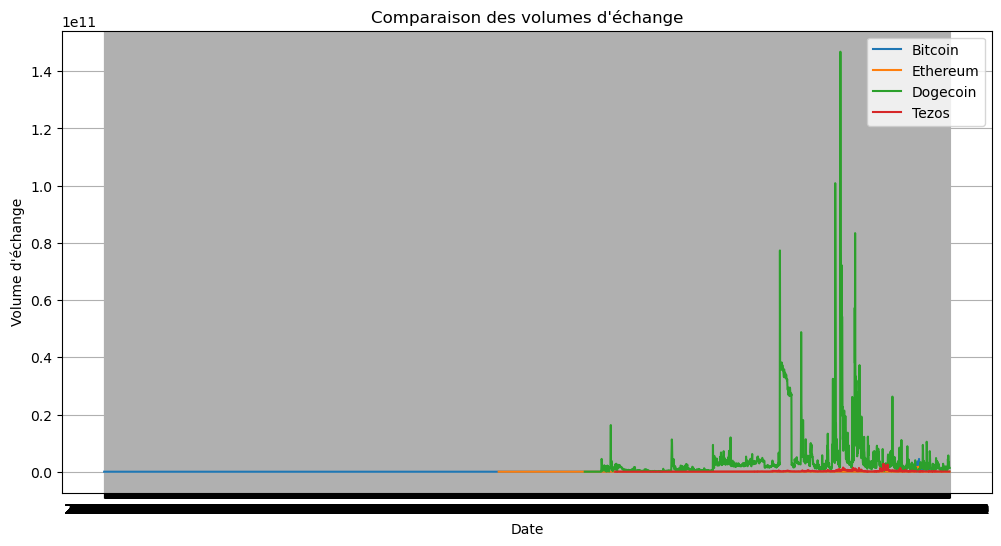

In [15]:
crypto_list = ["bitcoin", "ethereum", "dogecoin", "Tezos"]

subset_df = df[df["Crypto Name"].isin(crypto_list)]

pivot_table = subset_df.pivot_table(index='Date', columns='Crypto Name', values='Volume')

plt.figure(figsize=(12, 6))
for crypto in crypto_list:
    plt.plot(pivot_table.index, pivot_table[crypto], label=crypto.capitalize())

plt.title("Comparaison des volumes d'échange")
plt.xlabel("Date")
plt.ylabel("Volume d'échange")
plt.legend()
plt.grid(True)
plt.show()

Ce graphique illustre les volumes d'échange quotidiens de plusieurs cryptomonnaies (Bitcoin, Ethereum, Dogecoin et Tezos) sur une période donnée. Les volumes d'échange représentent la quantité totale de transactions effectuées pour chaque cryptomonnaie en une journée. Malgré le fait que le BTC soit la cryptomonnaies la plus utilisé dans le monde et ayant la plus grosse capitalisation le DOGE et la plus échangé dans le monde. En réalité cela est du aux valeurs très différentes entres les cryptomonnaies (100 000 usd pour le  BTC contre 0,3 pour le DOGE).